# This notebook is for the purpose of Capstone assignment for Data Science professional Course



## First part is to download and convert the html table into pandas dataframe

In [82]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysisebook. If it does
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#pip3 install geopy  # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [3]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

data=pd.read_html(url)

tor_data=data[0]


In [4]:
tor_data.shape
tor_data.head()
tor_data.describe()

Postal code       Borough Neighborhood
count          180           180          103
unique         180            11           98
top            M5R  Not assigned    Downsview
freq             1            77            4

## Dropping all the "Not Assigned Values" in Bourogh Column

In [5]:
index=tor_data[tor_data["Borough"]=="Not assigned"].index

In [6]:
tor_data.drop(index , inplace=True)

In [7]:
tor_data=tor_data.reset_index(drop=True)

## As the data already combines the multiple with a "/" separator, in the next part of the code we replace it with "," as a separator 

In [8]:
tor_data["Neighborhood"]=tor_data["Neighborhood"].str.replace("/" , ",")

In [9]:
tor_data.shape

(103, 3)

In [10]:
tor_data

Postal code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Vic

## Answer 2

### Getting the Location Data



In [11]:
df=tor_data.sort_values(["Postal code"]).reset_index(drop=True)
df.iloc[0,0]

'M1B'

In [12]:
loc_data= pd.read_csv("Geospatial_Coordinates.csv")

In [13]:
loc_data

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.782736 -79.442259
25          M3A  43.753259 -79.329656
26          M3B  43.745906 -79.352188
27          M3C  43.725900 -79.340923
28          M3H  43.754328 -79.442259
29          M3J  43.767980 -79.487262
30          M3K  43.737473 -79.464763
31          M3L  43.739015 -79.506944
32          M3M  43.728496 -79.495697
33          M3N  43.761631 -79.520999
34          M4A  43.725882 -79.315572
35          M4B  43.706397 -79.309937
36          M4C  43.695344 -79.318389
37          M4E  43.676357 -79.293031
38          M4G  43.709060 -79.363452
39          M4H  43.705369 -79.349372
40          M4J  43.685347 -79.338106
41          M4K  43.679557 -79.352188
42          M4L  43.668999 -79.315572
43          M4M  43.659526 -79.340923
44          M4N  43.728020 -79.388790
45          M4P  43.712751 -79.390197
46          M4R  43.715383 -79.405678
47          M4S  43.704324 -79.388790
48          M4T  43.689574 -79.383160
49          M4V  43.686412 -79.400049
50          M4W  43.679563 -79.377529
51          M4X  43.667967 -79.367675
52          M4Y  43.665860 -79.383160
53          M5A  43.654260 -79.360636
54          M5B  43.657162 -79.378937
55          M5C  43.651494 -79.375418
56          M5E  43.644771 -79.373306
57          M5G  43.657952 -79.387383
58          M5H  43.650571 -79.384568
59          M5J  43.640816 -79.381752
60          M5K  43.647177 -79.381576
61          M5L  43.648198 -79.379817
62          M5M  43.733283 -79.419750
63          M5N  43.711695 -79.416936
64          M5P  43.696948 -79.411307
65          M5R  43.672710 -79.405678
66          M5S  43.662696 -79.400049
67          M5T  43.653206 -79.400049
68          M5V  43.628947 -79.394420
69          M5W  43.646435 -79.374846
70          M5X  43.648429 -79.382280
71          M6A  43.718518 -79.464763
72          M6B  43.709577 -79.445073
73          M6C  43.693781 -79.428191
74          M6E  43.689026 -79.453512
75          M6G  43.669542 -79.422564
76          M6H  43.669005 -79.442259
77          M6J  43.647927 -79.419750
78          M6K  43.636847 -79.428191
79          M6L  43.713756 -79.490074
80          M6M  43.691116 -79.476013
81          M6N  43.673185 -79.487262
82          M6P  43.661608 -79.464763
83          M6R  43.648960 -79.456325
84          M6S  43.651571 -79.484450
85          M7A  43.662301 -79.389494
86          M7R  43.636966 -79.615819
87          M7Y  43.662744 -79.321558
88          M8V  43.605647 -79.501321
89          M8W  43.602414 -79.543484
90          M8X  43.653654 -79.506944
91          M8Y  43.636258 -79.498509
92          M8Z  43.628841 -79.520999
93          M9A  43.667856 -79.532242
94          M9B  43.650943 -79.554724
95          M9C  43.643515 -79.577201
96          M9L  43.756303 -79.565963
97          M9M  43.724766 -79.532242
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

In [14]:
features=["Postal code" , "Borough" , "Neighborhood" , "Latitude", "Longitude"]
#data=[[tor_data["Postal code"]],[tor_data["Borough"]],[tor_data["Neighborhood"]], [loc_data["Latitude"]] , [loc_data["Longitude"]]]
d1=np.asarray(df[["Postal code" ,"Borough", "Neighborhood"]])
d2=np.asarray(loc_data[["Latitude", "Longitude"]])
data=np.concatenate((d1,d2),axis=1)
data[0]

array(['M1B', 'Scarborough', 'Malvern , Rouge', 43.806686299999996,
       -79.19435340000001], dtype=object)

In [15]:
Tor_loc=pd.DataFrame(data,columns=features)

In [16]:
Tor_loc

Postal code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
16          M1X       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
20          M2L        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
44          M4N   Central Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
93          M9A         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood Latitude Longitude  
0                                      Malvern , Rouge  43.8067  -79.1944  
1  

In [17]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Tor_loc['Borough'].unique()),
        Tor_loc.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


# Answer 3 
### exploring the nighborhood and creating clusters

In [60]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of toronto are 43.6534817, -79.3839347.


In [61]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Tor_loc['Latitude'], Tor_loc['Longitude'], Tor_loc['Borough'], Tor_loc['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Adding foursquare credintials

In [19]:
CLIENT_ID = 'CGQFSEMWBWLPZWKGFMXJ2USIL1NXACYRDDAG2NEMFUUQNJSI' # your Foursquare ID
CLIENT_SECRET = 'NZL555SB0JLTVNCI24RKP5ZOMR5YPDAMOQZ2H3ZLRCUKBG5P' # your Foursquare Secret
VERSION = '20200101' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CGQFSEMWBWLPZWKGFMXJ2USIL1NXACYRDDAG2NEMFUUQNJSI
CLIENT_SECRET:NZL555SB0JLTVNCI24RKP5ZOMR5YPDAMOQZ2H3ZLRCUKBG5P


## 2. Explore Neighborhoods in toronto
#### Let's create a function to explore all the neighborhoods in toronto

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
toronto_venues = getNearbyVenues(names=Tor_loc['Neighborhood'],
                                   latitudes=Tor_loc['Latitude'],
                                   longitudes=Tor_loc['Longitude']
                                  )


Malvern , Rouge
Rouge Hill , Port Union , Highland Creek
Guildwood , Morningside , West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park , Ionview , East Birchmount Park
Golden Mile , Clairlea , Oakridge
Cliffside , Cliffcrest , Scarborough Village West
Birch Cliff , Cliffside West
Dorset Park , Wexford Heights , Scarborough Town Centre
Wexford , Maryvale
Agincourt
Clarks Corners , Tam O'Shanter , Sullivan
Milliken , Agincourt North , Steeles East , L'Amoreaux East
Steeles West , L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview , Henry Farm , Oriole
Bayview Village
York Mills , Silver Hills
Willowdale , Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor , Wilson Heights , Downsview North
Northwood Park , York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill , Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West , Riverdale
India Bazaar , The Beaches 

In [22]:
print(toronto_venues.shape)
toronto_venues.head()

(2143, 7)


Neighborhood  Neighborhood Latitude  \
0                           Malvern , Rouge              43.806686   
1  Rouge Hill , Port Union , Highland Creek              43.784535   
2  Rouge Hill , Port Union , Highland Creek              43.784535   
3       Guildwood , Morningside , West Hill              43.763573   
4       Guildwood , Morningside , West Hill              43.763573   

   Neighborhood Longitude                                              Venue  \
0              -79.194353                                            Wendy’s   
1              -79.160497                              Royal Canadian Legion   
2              -79.160497  SEBS Engineering Inc. (Sustainable Energy and ...   
3              -79.188711                                  G & G Electronics   
4              -79.188711                                   Big Bite Burrito   

   Venue Latitude  Venue Longitude              Venue Category  
0       43.807448       -79.199056        Fast Food Restaurant  
1       43.782533       -79.163085                         Bar  
2       43.782371       -79.156820  Construction & Landscaping  
3       43.765309       -79.191537           Electronics Store  
4       43.766299       -79.190720          Mexican Restaurant

#### Let's check how many venues were returned for each neighborhood

In [23]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               4   
Alderwood , Long Branch                                                 9   
Bathurst Manor , Wilson Heights , Downsview North                      21   
Bayview Village                                                         4   
Bedford Park , Lawrence Manor East                                     23   
Berczy Park                                                            57   
Birch Cliff , Cliffside West                                            4   
Brockton , Parkdale Village , Exhibition Place                         23   
Business reply mail Processing CentrE                                  17   
CN Tower , King and Spadina , Railway Lands , H...                     17   
Caledonia-Fairbanks                                                     4   
Canada Post Gateway Processing Centre                                  13   
Cedarbrae                                                               8   
Central Bay Street                                                     65   
Christie                                                               18   
Church and Wellesley                                                   72   
Clarks Corners , Tam O'Shanter , Sullivan                              16   
Cliffside , Cliffcrest , Scarborough Village West                       2   
Commerce Court , Victoria Hotel                                       100   
Davisville                                                             37   
Davisville North                                                        7   
Del Ray , Mount Dennis , Keelsdale and Silverthorn                      4   
Don Mills                                                              26   
Dorset Park , Wexford Heights , Scarborough Tow...                      6   
Downsview                                                              15   
Dufferin , Dovercourt Village                                          16   
East Toronto                                                            4   
Eringate , Bloordale Gardens , Old Burnhamthorp...                      9   
Fairview , Henry Farm , Oriole                                         64   
First Canadian Place , Underground city                               100   
Forest Hill North & West                                                4   
Garden District, Ryerson                                              100   
Glencairn                                                               4   
Golden Mile , Clairlea , Oakridge                                      10   
Guildwood , Morningside , West Hill                                     7   
Harbourfront East , Union Station , Toronto Isl...                    100   
High Park , The Junction South                                         22   
Hillcrest Village                                                       4   
Humber Summit                                                           2   
Humberlea , Emery                                                       2   
Humewood-Cedarvale                                                      4   
India Bazaar , The Beaches West                                        20   
Kennedy Park , Ionview , East Birchmount Park                           8   
Kensington Market , Chinatown , Grange Park                            59   
Kingsview Village , St. Phillips , Martin Grove...                      4   
Lawrence Manor , Lawrence Heights                                      15   
Lawrence Park                                                           3   
Leaside                                                                33   
Little Portugal , Trinity                                              41   
Malvern , Rouge                                                         1   
Milliken , Agincourt North , Steeles East , L'A.

#### Let's find out how many unique categories can be curated from all the returned venues

In [24]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


## 3. Analyze Each Neighborhood

In [25]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

toronto_onehot.head()

Accessories Store  Airport  Airport Food Court  Airport Gate  \
0                  0        0                   0             0   
1                  0        0                   0             0   
2                  0        0                   0             0   
3                  0        0                   0             0   
4                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  \
0                 0                   0              0          0           0   
1                 0                   0              0          0           0   
2                 0                   0              0          0           0   
3                 0                   0              0          0           0   
4                 0                   0              0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    1               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0                 0                   0      0                0         0   
1                 0                   0      0                0         0   
2                 0                   0      0                0         0   
3                 0                   0      0                0         0   
4                 0                   0      0                0         0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Board Shop  \
0           0                   0          0       0           0   
1           0                   0          0       0           0   
2           0                   0          0       0           0   
3           0                   0          0       0           0   
4           0                   0          0       0           0   

   Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  \
0              0          0         0                     0               0   
1              0          0         0                     0               0   
2              0          0         0                     0               0   
3              0          0         0                     0               0   
4              0          0         0                     0               0   

   Brewery  Bridal Shop  Bubble Tea Shop  Building  Burger Joint  \
0        0            0                0         0             0   
1        0            0                0         0             0   
2        0            0                0         0             0   
3        0            0                0         0             0   
4        0            0                0         0             0   

   Burrito Place  Bus 

In [26]:
toronto_onehot.shape

(2143, 269)

## Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Accessories Store  \
0                                           Agincourt           0.000000   
1                             Alderwood , Long Branch           0.000000   
2   Bathurst Manor , Wilson Heights , Downsview North           0.000000   
3                                     Bayview Village           0.000000   
4                  Bedford Park , Lawrence Manor East           0.000000   
5                                         Berczy Park           0.000000   
6                        Birch Cliff , Cliffside West           0.000000   
7      Brockton , Parkdale Village , Exhibition Place           0.000000   
8               Business reply mail Processing CentrE           0.000000   
9   CN Tower , King and Spadina , Railway Lands , ...           0.000000   
10                                Caledonia-Fairbanks           0.000000   
11              Canada Post Gateway Processing Centre           0.000000   
12                                          Cedarbrae           0.000000   
13                                 Central Bay Street           0.000000   
14                                           Christie           0.000000   
15                               Church and Wellesley           0.000000   
16          Clarks Corners , Tam O'Shanter , Sullivan           0.000000   
17  Cliffside , Cliffcrest , Scarborough Village West           0.000000   
18                    Commerce Court , Victoria Hotel           0.000000   
19                                         Davisville           0.000000   
20                                   Davisville North           0.000000   
21  Del Ray , Mount Dennis , Keelsdale and Silvert...           0.000000   
22                                          Don Mills           0.000000   
23  Dorset Park , Wexford Heights , Scarborough To...           0.000000   
24                                          Downsview           0.000000   
25                      Dufferin , Dovercourt Village           0.000000   
26                                       East Toronto           0.000000   
27  Eringate , Bloordale Gardens , Old Burnhamthor...           0.000000   
28                     Fairview , Henry Farm , Oriole           0.000000   
29            First Canadian Place , Underground city           0.000000   
30                           Forest Hill North & West           0.000000   
31                           Garden District, Ryerson           0.000000   
32                                          Glencairn           0.000000   
33                  Golden Mile , Clairlea , Oakridge           0.000000   
34                Guildwood , Morningside , West Hill           0.000000   
35  Harbourfront East , Union Station , Toronto Is...           0.000000   
36                     High Park , The Junction South           0.000000   
37                                  Hillcrest Village           0.000000   
38                                      Humber Summit           0.000000   
39                                  Humberlea , Emery           0.000000   
40                                 Humewood-Cedarvale           0.000000   
41                    India Bazaar , The Beaches West           0.000000   
42      Kennedy Park , Ionview , East Birchmount Park           0.000000   
43        Kensington Market , Chinatown , Grange Park           0.000000   
44  Kingsview Village , St. Phillips , Martin Grov...           0.000000   
45                  Lawrence Manor , Lawrence Heights           0.066667   
46                                      Lawrence Park           0.000000   
47                                            Leaside           0.000000   
48                          Little Portugal , Trinity           0.000000   
49                                    Malvern , Rouge           0.000000   
50  Milliken , Agincourt North , Steeles East , L'...           0.000000   
51  Mimico NW , The Queensway West , South of Bloo...           0.000000   
52           

In [28]:
toronto_grouped.shape

(94, 269)

In [66]:
len(toronto_grouped[toronto_grouped["Indian Restaurant"] > 0])

11

In [67]:
toronto_indian = toronto_grouped[["Neighborhood","Indian Restaurant"]]

In [68]:
toronto_indian

Neighborhood  Indian Restaurant
0                                           Agincourt           0.000000
1                             Alderwood , Long Branch           0.000000
2   Bathurst Manor , Wilson Heights , Downsview North           0.000000
3                                     Bayview Village           0.000000
4                  Bedford Park , Lawrence Manor East           0.043478
5                                         Berczy Park           0.000000
6                        Birch Cliff , Cliffside West           0.000000
7      Brockton , Parkdale Village , Exhibition Place           0.000000
8               Business reply mail Processing CentrE           0.000000
9   CN Tower , King and Spadina , Railway Lands , ...           0.000000
10                                Caledonia-Fairbanks           0.000000
11              Canada Post Gateway Processing Centre           0.000000
12                                          Cedarbrae           0.000000
13                                 Central Bay Street           0.015385
14                                           Christie           0.000000
15                               Church and Wellesley           0.013889
16          Clarks Corners , Tam O'Shanter , Sullivan           0.000000
17  Cliffside , Cliffcrest , Scarborough Village West           0.000000
18                    Commerce Court , Victoria Hotel           0.000000
19                                         Davisville           0.027027
20                                   Davisville North           0.000000
21  Del Ray , Mount Dennis , Keelsdale and Silvert...           0.000000
22                                          Don Mills           0.000000
23  Dorset Park , Wexford Heights , Scarborough To...           0.333333
24                                          Downsview           0.000000
25                      Dufferin , Dovercourt Village           0.000000
26                                       East Toronto           0.000000
27  Eringate , Bloordale Gardens , Old Burnhamthor...           0.000000
28                     Fairview , Henry Farm , Oriole           0.000000
29            First Canadian Place , Underground city           0.000000
30                           Forest Hill North & West           0.000000
31                           Garden District, Ryerson           0.000000
32                                          Glencairn           0.000000
33                  Golden Mile , Clairlea , Oakridge           0.000000
34                Guildwood , Morningside , West Hill           0.000000
35  Harbourfront East , Union Station , Toronto Is...           0.010000
36                     High Park , The Junction South           0.000000
37                                  Hillcrest Village           0.000000
38                                      Humber Summit           0.000000
39                                  Humberlea , Emery           0.000000
40                                 Humewood-Cedarvale           0.000000
41                    India Bazaar , The Beaches West           0.000000
42      Kennedy Park , Ionview , East Birchmount Park           0.000000
43        Kensington Market , Chinatown , Grange Park           0.000000
44  Kingsview Village , St. Phillips , Martin Grov...           0.000000
45                  Lawrence Manor , Lawrence Heights           0.000000
46                                      Lawrence Park           0.000000
47                                            Leaside           0.000000
48                          Little Portugal , Trinity           0.000000
49                                    Malvern , Rouge           0.000000
50  Milliken , Agincourt North , Steeles East , L'...           0.000000
51  Mimico NW , The Queensway West , South of Bloo...           0.000000
52                       Moore Park , Summerhill East           0.000000
53     New Toronto , Mimico South , Humber Bay Shores           0.000000
54         North Park , Ma

# Cluster Neighbourhood
#### I am chosing to make 4 clusters but one can do loop over number of clusters to get right amount of clusters.

In [69]:
# set number of clusters
kclusters = 3

toronto_indian_clustering = toronto_indian.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_indian_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0], dtype=int32)

In [70]:
# add clustering labels
toronto_indian.insert(0, 'Cluster Labels', kmeans.labels_)


In [71]:

toronto_merged = toronto_indian

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged =toronto_merged.join(toronto_venues.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

Cluster Labels             Neighborhood  Indian Restaurant  \
0               0                Agincourt                0.0   
0               0                Agincourt                0.0   
0               0                Agincourt                0.0   
0               0                Agincourt                0.0   
1               0  Alderwood , Long Branch                0.0   

   Neighborhood Latitude  Neighborhood Longitude  \
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
1              43.602414              -79.543484   

                              Venue  Venue Latitude  Venue Longitude  \
0       Panagio's Breakfast & Lunch       43.792370       -79.260203   
0                     El Pulgarcito       43.792648       -79.259208   
0                          Twilight       43.791999       -79.258584   
0                   Commander Arena       43.794867       -79.267989   
1  Il Paesano Pizzeria & Restaurant       43.601280       -79.545028   

              Venue Category  
0             Breakfast Spot  
0  Latin American Restaurant  
0                     Lounge  
0               Skating Rink  
1                Pizza Place

# dropping null values

In [72]:
print(toronto_merged.shape)
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged

(2143, 9)


Cluster Labels                                       Neighborhood  \
0                0                                          Agincourt   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide

In [73]:
toronto_merged=toronto_merged.dropna()
toronto_merged

Cluster Labels                                       Neighborhood  \
0                0                                          Agincourt   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide

## Lets visualise the final clustering on a folium map

In [74]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Analysing the clusters

# Cluster 1



In [182]:
#oronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_1=toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
cluster_1

Cluster Labels                                       Neighborhood  \
0                0                                          Agincourt   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide , King   
64               0                         Richmond , Adelaide

# cluster 2

In [133]:
cluster_2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
cluster_2

# cluster 3


In [174]:
cluster_3=toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]
cluster_3

Cluster Labels      Neighborhood  Indian Restaurant  \
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   
82               2  Thorncliffe Park           0.111111   

    Neighborhood Latitude  Neighborhood Longitude                       Venue  \
82              43.705369              -79.349372             TD Canada Trust   
82              43.705369              -79.349372                Leaside park   
82              43.705369              -79.349372                 Food Basics   
82              43.705369              -79.349372                         A&W   
82              43.705369              -79.349372                 Tim Hortons   
82              43.705369              -79.349372                 Pizza Pizza   
82              43.705369              -79.349372                Petro-Canada   
82              43.705369              -79.349372                Hakka Garden   
82              43.705369              -79.349372              Kandahar Kabab   
82              43.705369              -79.349372                      Subway   
82              43.705369              -79.349372      Hero Certified Burgers   
82              43.705369              -79.349372          Shoppers Drug Mart   
82              43.705369              -79.349372                Swiss Chalet   
82              43.705369              -79.349372                    Fit4Less   
82              43.705369              -79.349372  Iqbal Kebab & Sweet Centre   
82              43.705369              -79.349372                      Costco   
82              43.705369              -79.349372                 Iqbal foods   
82              43.705369              -79.349372       Bikram Yoga East York   

    Venue Latitude  Venue Longitude             Venue Category  
82       43.706356       -79.345643                       Bank  
82       43.702177       -79.351377                       Park  
82       43.705311       -79.347322                Supermarket  
82       43.706275       -79.344670       Fast Food Restaurant  
82       43.705090       -79.350545                Coffee Shop  
82       43.705564       -79.347139                Pizza Place  
82       43.704058       -79.348094                Gas Station  
82       43.704578       -79.349770          Indian Restaurant  
82       43.705250       -79.348625  Middle Eastern Restaurant  
82       43.704596       -79.349670             Sandwich Place  
82       43.705511       -79.347064               Burger Joint  
82       43.705810       -79.347044                   Pharmacy  
82       43.707786       -79.344132                 Restaurant  
82       43.705689       -79.346018                        Gym  
82       43.705923       -79.351521          Indian Restaurant  
82       43.707051       -79.348093            Warehouse Store  
82       43.705751       -79.352054              Grocery Store  
82       43.705450       -79.351448                Yoga Studio

In [157]:
mean_1=cluster_1["Indian Restaurant"].mean()
mean_2=cluster_2["Indian Restaurant"].mean()
mean_3=cluster_3["Indian Restaurant"].mean()
Mean=pd.DataFrame(data=np.array([[mean_1],[mean_2],[mean_3]]), columns=["freq"], index=["c1","c2", "c3"])

Text(0.5, 0, 'Clusters in Toronto')

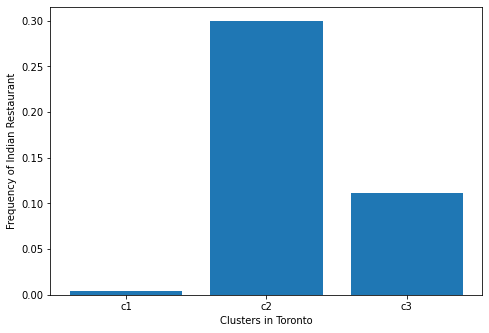

In [181]:
fig = plt.figure()
#xlabel("Cluster number")fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ["c1","c2", "c3"]

ax.bar(clust,Mean["freq"])
ax.set_ylabel('Frequency of Indian Restaurant')
ax.set_xlabel("Clusters in Toronto")

# Suggestions
As we can see from th cluster analysis that cluster 1 (c1) has the least amount of Indian restaurants wherease cluster 2(c2) has the most amount of Indian restaurants. We will suggest the manager to look for a places in the neighbourhood of the cluster 1 for future opening of a Indian Restaurant. 